# Setup

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
#import pylab as plt
import rbepwt
import numpy as np
import pandas as pd
import scipy.interpolate
plt.rcParams['figure.figsize'] = (12, 12)

In [77]:
img_codenames = ['peppers256-easypath-bior4.4-16levels',\
                 'peppers256-gradpath-bior4.4-16levels',\
                 'peppers256-epwt-easypath-bior4.4-16levels',\
                 'house256-easypath-bior4.4-16levels',\
                 'house256-gradpath-bior4.4-16levels',
                 'house256-epwt-easypath-bior4.4-16levels',\
                 'cameraman256-easypath-bior4.4-16levels',\
                 'cameraman256-gradpath-bior4.4-16levels',\
                 'cameraman256-epwt-easypath-bior4.4-16levels',\
]
img_codenames = ['peppers256-gradpath-haar-16levels']
#they havel all 256*256=65536 pixels
thresholds = [4096,2048,1024,512]
#save = False
table = pd.DataFrame(columns=['image','encoding','wavelet','levels','coefficients','psnr','ssim','vsi','haarpsi'])
imgpath = '../img/'
savedir = '../decoded_pickles/'
#table.loc[len(table)] = ['cameraman','easypath','bior4.4',16,4096,0.9,0.8,0.7,0.99999]
#table.loc[len(table)] = ['cameraman','easypath','bior4.4',16,4096,0.9,0.8,0.7,0.99999]
#table

# Compute rbepwt encodings and save them

In [57]:
#compute all the decodings and save the new pickles
for thresh in thresholds:
    for ic in img_codenames:
        imgpath = '../pickled/' + ic
        img = rbepwt.Image()
        img.load_pickle(imgpath)
        img.rbepwt.threshold_coefs(thresh)
        img.decode_rbepwt()
        savename = ic+'--'+str(thresh)
        img.save_pickle(savedir+savename)

        psnr = img.psnr()
        ssim = img.ssim()
        vsi = img.vsi()
        haarpsi = img.haarpsi()
        splitted = ic.split('-')
        imgname,encoding = splitted[:2]
        imgname = imgname.rstrip('256')
        #print(imgname,encoding)
        #table.loc[len(table)] = [imgname,encoding,'bior4.4',16,thresh,psnr,ssim,vsi,haarpsi]
        table.loc[len(table)] = [imgname,encoding,'haar',16,thresh,psnr,ssim,vsi,haarpsi]
        print(table)


--DECODING: finished working on level 16 

--DECODING: finished working on level 15 

--DECODING: finished working on level 14 

--DECODING: finished working on level 13 

--DECODING: finished working on level 12 

--DECODING: finished working on level 11 

--DECODING: finished working on level 10 

--DECODING: finished working on level 9 

--DECODING: finished working on level 8 

--DECODING: finished working on level 7 

--DECODING: finished working on level 6 

--DECODING: finished working on level 5 

--DECODING: finished working on level 4 

--DECODING: finished working on level 3 

--DECODING: finished working on level 2 

--DECODING: finished working on level 1 
     image  encoding wavelet  levels  coefficients       psnr     ssim  \
0  peppers  gradpath    haar    16.0        4096.0  93.616078  0.54879   

       vsi   haarpsi  
0  0.99959  0.999999  

--DECODING: finished working on level 16 

--DECODING: finished working on level 15 

--DECODING: finished working on level 1

# Compute DWT encodings and save them

In [78]:
#tensor product wavelet transform
imgpath = '../img/'
#fnames = ['peppers256.png','house256.png','cameraman256.png']
fnames = ['peppers256.png']
for thresh in thresholds: 
    for fname in fnames:
        img = rbepwt.Image()
        img.read(imgpath+fname)
        #img.encode_dwt(4,'bior4.4')
        img.encode_dwt(8,'haar')
        img.dwt.threshold_coefs(thresh)
        img.decode_dwt()
        psnr = img.psnr()
        ssim = img.ssim()
        vsi = img.vsi()
        haarpsi = img.haarpsi()
        imgname = fname.rstrip('.png')
        #savename = imgname+'-tensor-bior4.4-4levels--'+str(thresh)
        savename = imgname+'-tensor-haar-8levels--'+str(thresh)
        img.save_pickle(savedir+savename)
        #table.loc[len(table)] = [imgname.rstrip('256'),'tensor','bior4.4',4,thresh,psnr,ssim,vsi,haarpsi]
        table.loc[len(table)] = [imgname.rstrip('256'),'tensor','haar',8,thresh,psnr,ssim,vsi,haarpsi]

## Recompute table only

In [124]:
table = pd.DataFrame(columns=['image','encoding','wavelet','levels','coefficients','psnr','ssim','vsi','haarpsi'])
img_names = ['cameraman256','house256','peppers256']
#img_names = ['peppers256']
encodings = ['easypath','gradpath','epwt-easypath','tensor']
#encodings = ['gradpath','tensor']
for thresh in thresholds:
    for imgname in img_names:
        for enc in encodings:
            img = rbepwt.Image()
            if enc == 'tensor':
                levs = '4'
                #levs = '8'
            else:
                levs = '16'
            loadstr = savedir+imgname+'-'+enc+'-bior4.4'+'-'+levs+'levels--'+str(thresh)
            #loadstr = savedir+imgname+'-'+enc+'-haar'+'-'+levs+'levels--'+str(thresh)
            #print(loadstr)
            img.load_pickle(loadstr)
            psnr = img.psnr()
            ssim = img.ssim()
            vsi = img.vsi()
            haarpsi = img.haarpsi()
            table.loc[len(table)] = [imgname.rstrip('256'),enc,'bior4.4',int(levs),thresh,psnr,ssim,vsi,haarpsi]
            #table.loc[len(table)] = [imgname.rstrip('256'),enc,'haar',int(levs),thresh,psnr,ssim,vsi,haarpsi]

In [125]:
table

,image,encoding,wavelet,levels,coefficients,psnr,ssim,vsi,haarpsi
0,cameraman,easypath,bior4.4,16.0,4096.0,28.900037,0.820532,0.999721,0.999999
1,cameraman,gradpath,bior4.4,16.0,4096.0,29.521894,0.832385,0.999737,0.999999
2,cameraman,epwt-easypath,bior4.4,16.0,4096.0,29.973192,0.847150,0.999705,0.999999
3,cameraman,tensor,bior4.4,4.0,4096.0,30.132234,0.847916,0.999753,0.999999
4,house,easypath,bior4.4,16.0,4096.0,33.844858,0.860803,0.999835,1.000000
5,house,gradpath,bior4.4,16.0,4096.0,34.325236,0.867025,0.999857,1.000000
6,house,epwt-easypath,bior4.4,16.0,4096.0,33.809863,0.862853,0.999871,1.000000
7,house,tensor,bior4.4,4.0,4096.0,35.112772,0.875673,0.999922,1.000000
8,peppers,easypath,bior4.4,16.0,4096.0,28.927137,0.816162,0.999646,0.999999
9,peppers,gradpath,bior4.4,16.0,4096.0,29.296348,0.827239,0.999630,0.999999


In [126]:
tsorted = table.sort(columns=['image','coefficients'],ascending=[True,True])
#tsorted = table.sort(columns='haarpsi',ascending=False)
tsorted
#print(tsorted.to_csv())

/Users/renato/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,image,encoding,wavelet,levels,coefficients,psnr,ssim,vsi,haarpsi
36,cameraman,easypath,bior4.4,16.0,512.0,21.611216,0.636464,0.996946,0.999986
37,cameraman,gradpath,bior4.4,16.0,512.0,21.923318,0.644557,0.997216,0.999987
38,cameraman,epwt-easypath,bior4.4,16.0,512.0,22.499939,0.626363,0.997632,0.999990
39,cameraman,tensor,bior4.4,4.0,512.0,21.680314,0.601809,0.996625,0.999984
24,cameraman,easypath,bior4.4,16.0,1024.0,23.342109,0.690414,0.998498,0.999993
25,cameraman,gradpath,bior4.4,16.0,1024.0,23.801158,0.701238,0.998854,0.999994
26,cameraman,epwt-easypath,bior4.4,16.0,1024.0,24.240330,0.695717,0.998797,0.999995
27,cameraman,tensor,bior4.4,4.0,1024.0,24.107885,0.691781,0.998318,0.999993
12,cameraman,easypath,bior4.4,16.0,2048.0,25.680617,0.747693,0.999258,0.999997
13,cameraman,gradpath,bior4.4,16.0,2048.0,26.229506,0.758409,0.999460,0.999998


In [127]:
tsorted[(tsorted['coefficients'] == 1024) & (tsorted['image'] == 'peppers')].sort('psnr',ascending=False)

/Users/renato/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,image,encoding,wavelet,levels,coefficients,psnr,ssim,vsi,haarpsi
34,peppers,epwt-easypath,bior4.4,16.0,1024.0,24.215925,0.674624,0.997839,0.999994
35,peppers,tensor,bior4.4,4.0,1024.0,23.805877,0.695078,0.997763,0.999992
33,peppers,gradpath,bior4.4,16.0,1024.0,23.175041,0.638267,0.997206,0.999992
32,peppers,easypath,bior4.4,16.0,1024.0,23.107975,0.629090,0.997212,0.999992


In [128]:
tsorted[(tsorted['image'] == 'peppers')].sort('psnr',ascending=False)

/Users/renato/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,image,encoding,wavelet,levels,coefficients,psnr,ssim,vsi,haarpsi
11,peppers,tensor,bior4.4,4.0,4096.0,31.489856,0.879031,0.999834,0.999999
10,peppers,epwt-easypath,bior4.4,16.0,4096.0,30.105726,0.849215,0.999715,0.999999
9,peppers,gradpath,bior4.4,16.0,4096.0,29.296348,0.827239,0.999630,0.999999
8,peppers,easypath,bior4.4,16.0,4096.0,28.927137,0.816162,0.999646,0.999999
23,peppers,tensor,bior4.4,4.0,2048.0,27.137512,0.781757,0.999280,0.999997
22,peppers,epwt-easypath,bior4.4,16.0,2048.0,26.755845,0.762894,0.999085,0.999998
21,peppers,gradpath,bior4.4,16.0,2048.0,25.720040,0.729058,0.998944,0.999996
20,peppers,easypath,bior4.4,16.0,2048.0,25.536793,0.717331,0.998746,0.999997
34,peppers,epwt-easypath,bior4.4,16.0,1024.0,24.215925,0.674624,0.997839,0.999994
35,peppers,tensor,bior4.4,4.0,1024.0,23.805877,0.695078,0.997763,0.999992


# Decoded images

/Users/renato/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


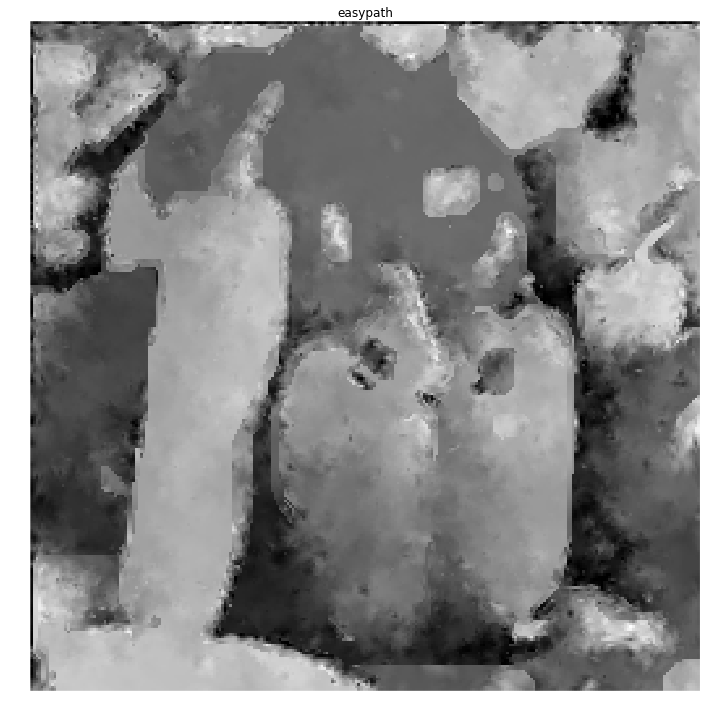

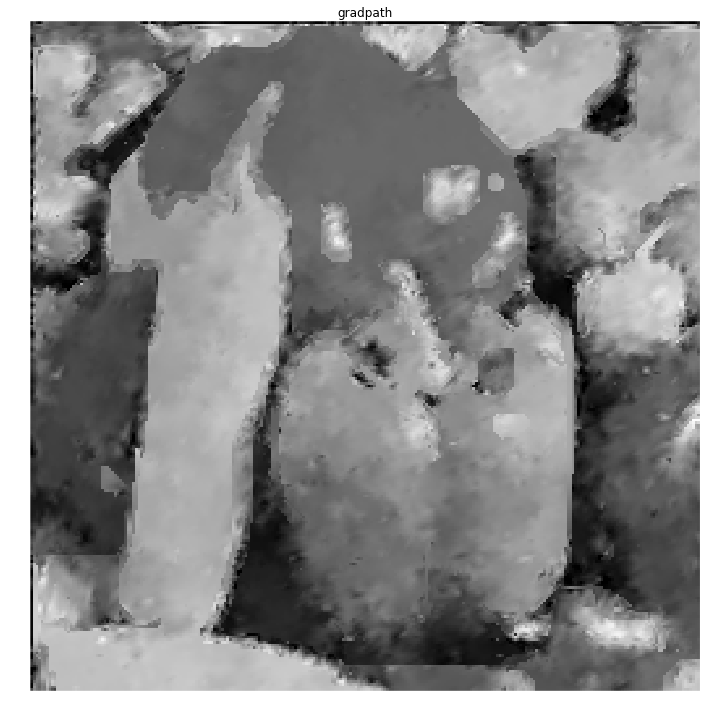

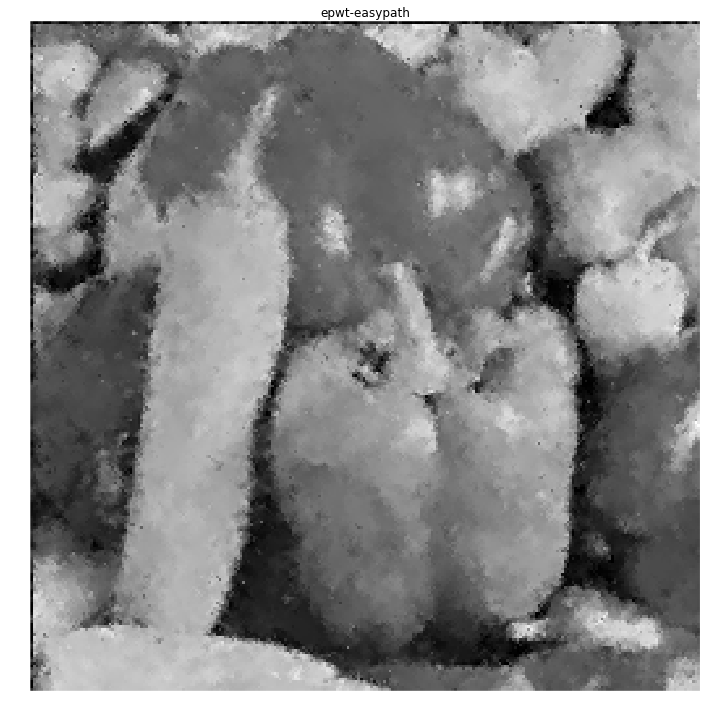

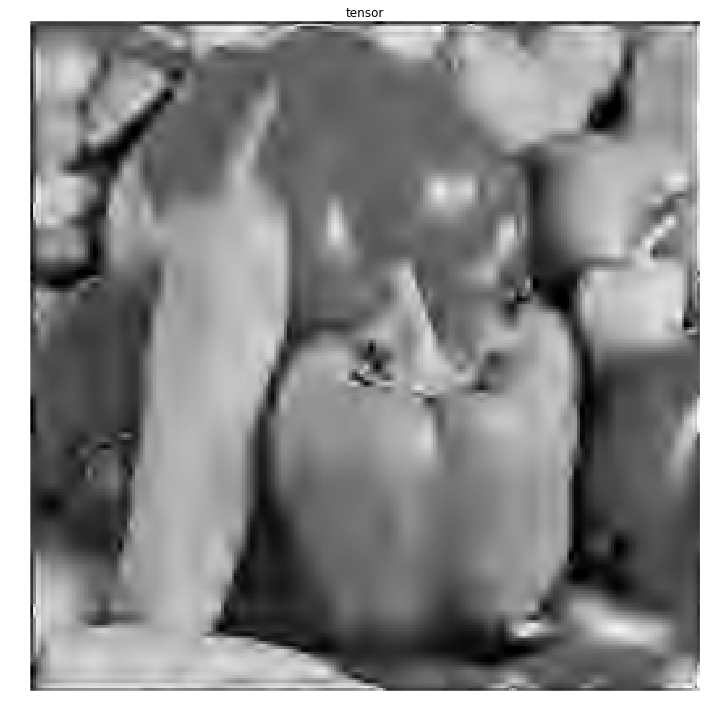

In [40]:
#imgname = 'cameraman256'
imgname = 'peppers256'
#imgname = 'house256'
ncoefs = 1024
for enc in ['easypath','gradpath','epwt-easypath','tensor']:
    img = rbepwt.Image()
    if enc == 'tensor':
        levs = '4'
    else:
        levs = '16'
    loadstr = savedir+imgname+'-'+enc+'-bior4.4'+'-'+levs+'levels--'+str(ncoefs)
    img.load_pickle(loadstr)
    img.show_decoded(title=enc)

## error plots

/Users/renato/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


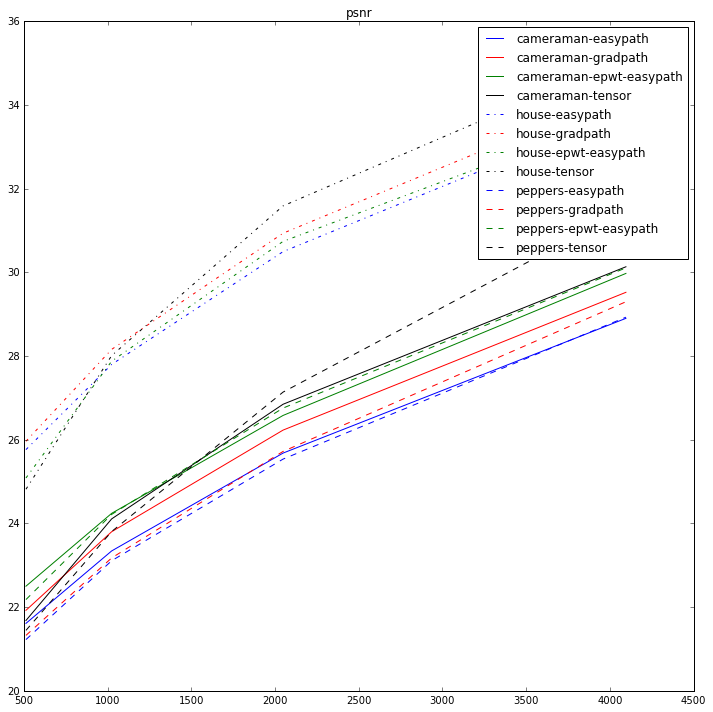

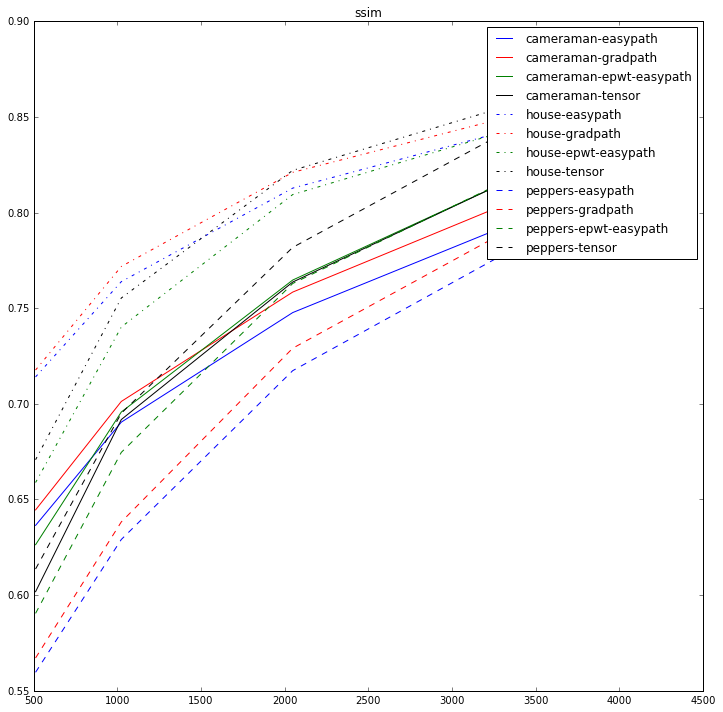

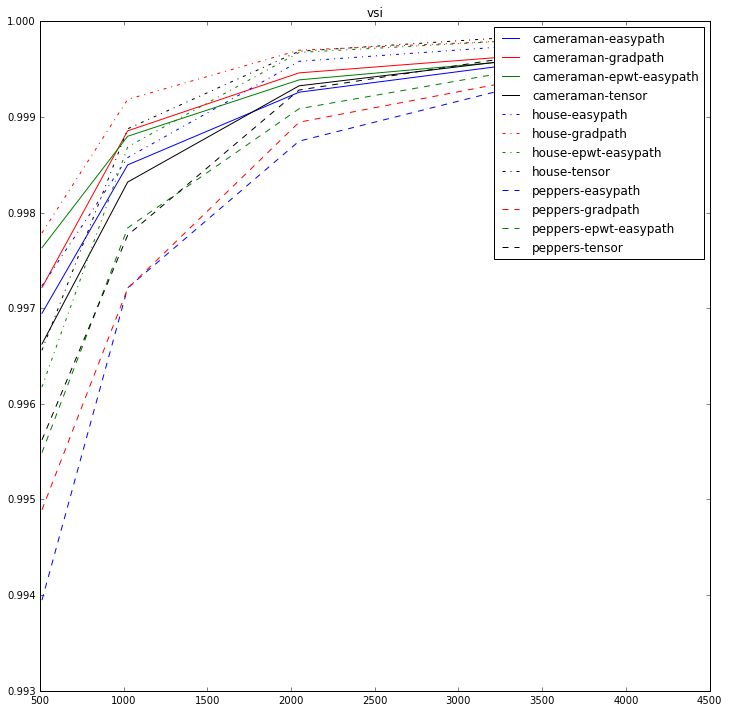

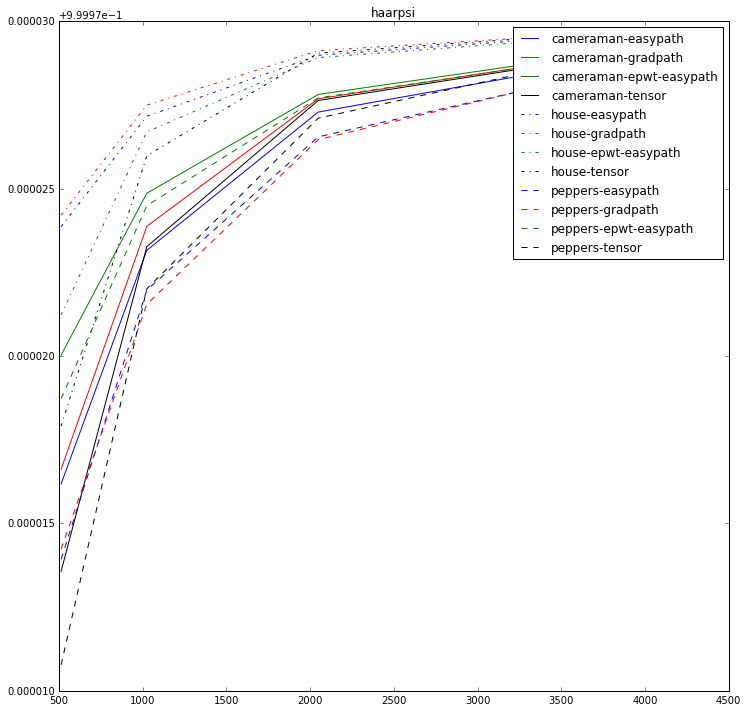

In [129]:
vecs = {}
for index in ['psnr','ssim','vsi','haarpsi']:
    fig = plt.figure()
    plt.title(index)
    for imgname in ['cameraman','house','peppers']:
        for enc in ['easypath','gradpath','epwt-easypath','tensor']:
            vec = np.array(table[(table['image'] == imgname) & (table['encoding'] == enc)].sort('coefficients')[index])
            #print(imgname,enc,vec)
            if enc == 'easypath':
                lsty = 'b'
            elif enc == 'gradpath':
                lsty = 'r'
            elif enc == 'epwt-easypath':
                lsty = 'g'
            elif enc == 'tensor':
                lsty = 'k'
            if imgname == 'cameraman':
                lsty += '-' 
            elif imgname == 'house':
                lsty += '-.'
            elif imgname == 'peppers':
                lsty += '--'
            #splinerange = np.arange(thresholds[-1],thresholds[0],(thresholds[0] - thresholds[-1])/10000)
            #spline = scipy.interpolate.spline(thresholds[::-1],vec,splinerange,order=2)
            #plt.plot(splinerange,spline,lsty,label=imgname+'-'+enc)
            plt.plot(thresholds[::-1],vec,lsty,label=imgname+'-'+enc)
    plt.legend()
    #plt.yscale('log')
    plt.show()

# Segmentations

/Users/renato/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


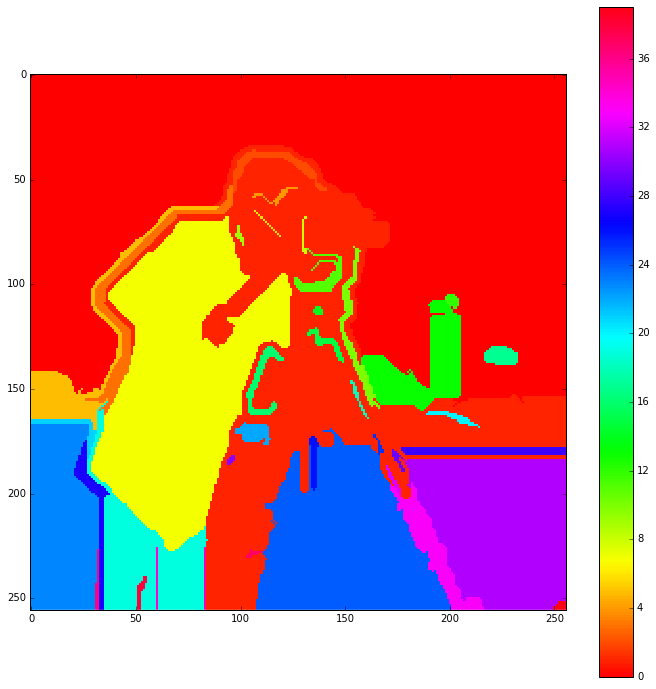

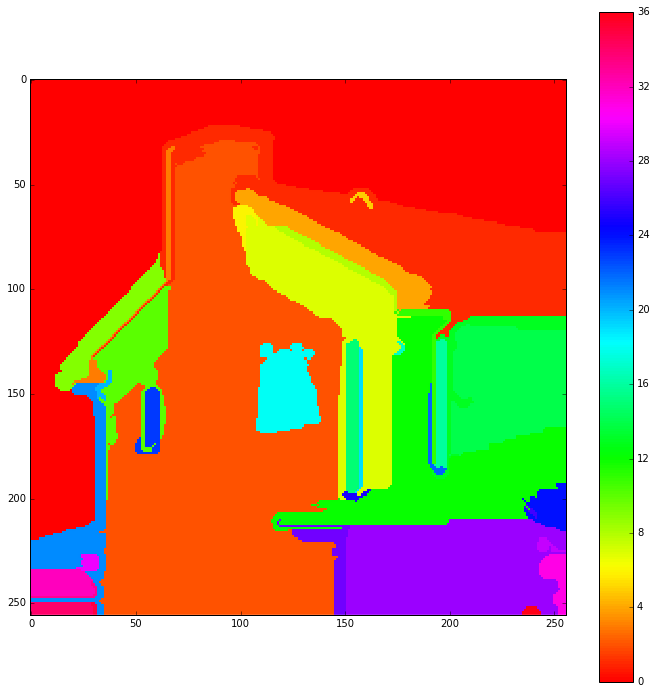

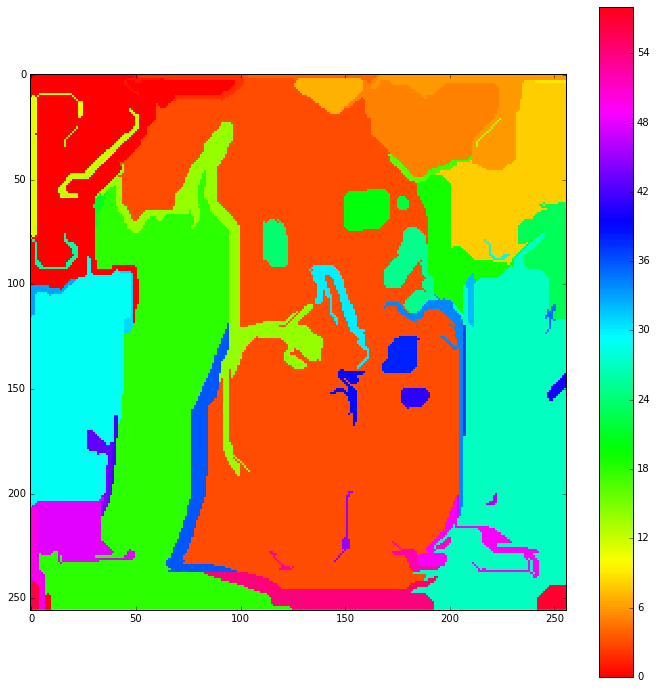

In [66]:
segm_table = pd.DataFrame(columns=['image','nregions','perimeter_length'])
for imgname in ['cameraman256','house256','peppers256']:
    loadstr = savedir+imgname+'-easypath-bior4.4-16levels--4096'
    #print(loadstr)
    img = rbepwt.Image()
    img.load_pickle(loadstr)
    img.show_segmentation()
    per = img.segmentation.estimate_perimeter()
    segm_table.loc[len(segm_table)] = [imgname.rstrip('256'),img.label_img.max() + 1,per]

In [67]:
segm_table

,image,nregions,perimeter_length
0,cameraman,40.0,4538.0
1,house,37.0,4441.0
2,peppers,59.0,6188.0


# Paths

/Users/renato/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


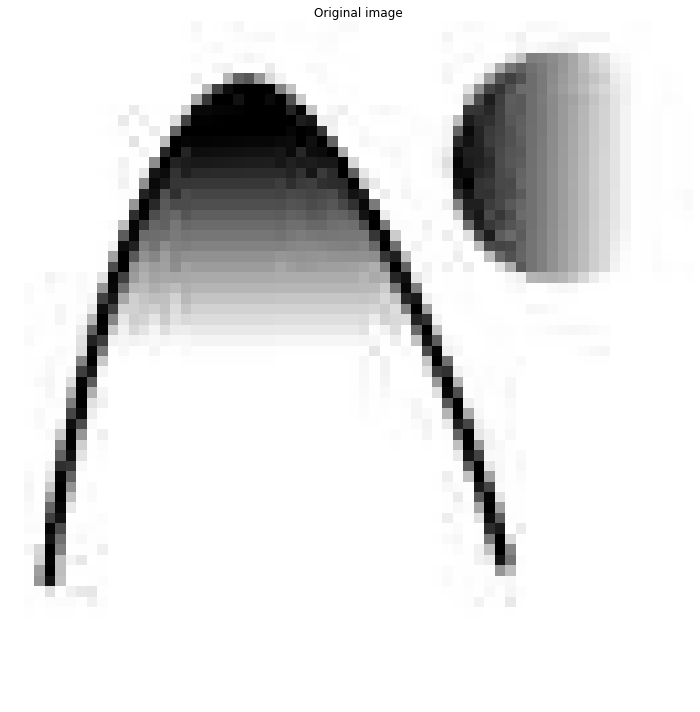

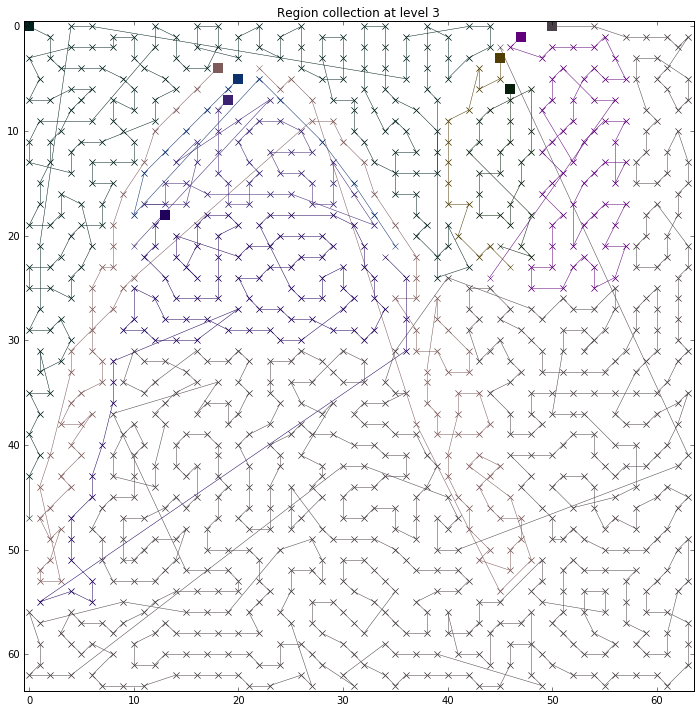

In [134]:
#loadstr = savedir+'peppers256-gradpath-bior4.4-16levels--4096'
#loadstr = '../pickled/gradient64-gradpath-bior4.4-12levels'
loadstr = '../pickled/gradient64-gradpath-bior4.4-8levels'
img = rbepwt.Image()
img.load_pickle(loadstr)
img.show()
img.rbepwt.show(levels=[3])

In [123]:
import skimage.measure as skim
#loadstr = '../decoded_pickles/peppers256-tensor-haar-8levels--1024'
loadstr = '../decoded_pickles/peppers256-tensor-bior4.4-4levels--1024'
img = rbepwt.Image()
img.load_pickle(loadstr)
mine = [img.psnr(),img.ssim()]
ski = [skim.compare_psnr(img.img.astype('float64'),img.decoded_img,dynamic_range=256),\
      skim.compare_ssim(img.img.astype('float64'),img.decoded_img,dynamic_range=256),\
      skim.compare_mse(img.img.astype('float64'),img.decoded_img)]
print(mine,'\n',ski)


[23.805876738329474, 0.69507781507690736] 
 [23.80587673832947, 0.69507781507690736, 272.83008403944137]
